In [1]:
from math import pi
import matplotlib.pyplot as plt
# from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now
import numpy as np

In [2]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 40
np.random.seed(seed)

In [3]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[i for i in range(num_qubits)])

    qml.RY(wires=0,phi=theta[0])
    qml.RZ(wires=0,phi=theta[1])
    qml.RY(wires=0,phi=theta[2])
    # qml.RZ(wires=0,phi=theta[3])

    # qml.RY(wires=1,phi=theta[1])
    # qml.CNOT(wires=[0,1])
    # return qml.probs(wires=[0,1])
    # return qml.probs(wires=[0])
    return qml.expval(qml.PauliZ(wires=0))

In [4]:
def encoder(x):
    # vector_x = [x,x**2,x**3,x**4]
    vector_x = [1,x]
    # vector_x = [x+x**2,1+x**3]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [5]:

def f(theta,w,x):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    # return (f_val[1]*(norm_x**2))*rescale_coef+w[1]
    return (f_val*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [6]:

from scipy.optimize import minimize




# Differential equation parameters
ws = 376.9911
# Boundary condition 
coefii = 10

# del_0 = 0  #del
# omega_0 = 0     #w
del_0_v = 0.03416719907063237
omega_0_v = 37.5857909248138


K1 = 5/coefii
K2 = 10/coefii
K3 = 1.7/coefii
ws = ws/coefii
def DE(f,f_prime,f_double_prime,t):
    delta = f
    delta_prime = f_prime
    omega = delta_prime+ws
    omega_prime = f_double_prime
    return (delta_prime+ws-omega)+omega_prime-K1+K2*np.sin(coefii*delta)+K3*(-ws+omega)*coefii
    

n_grid = 20
range_min =2.5
range_max = 3
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]
# print(dt)
print(t_data)
# del_target_values = [-0.1, -0.08568864375010266, -0.07135199292327042, -0.05703216366155178, -0.04277533332758968, -0.028630566403092566, -0.014648393492369936, -0.0008786099410683636, 0.012629993562057113, 0.025830965225360485, 0.03868190003112095, 0.05114514907683676, 0.06318818053413534, 0.07478349631699908, 0.08590929364185632, 0.09655108128205876, 0.10669910851327256, 0.11634802541217151, 0.12549688285643618, 0.13414913252475494, 0.1423124546002818, 0.14999727816970396, 0.1572170147933966, 0.16398646160587024, 0.17032150117763253, 0.17623910151518826, 0.18175731606103976, 0.18689528211221512, 0.19167252338163385, 0.1961073022258, 0.2002172705183872, 0.2040196495808423, 0.20753123018238517, 0.21076837254000894, 0.21374700631847987, 0.2164826306303374, 0.21899031403589397, 0.22128469454323552, 0.2233792634241711, 0.22528520015009165, 0.22701309424038968, 0.22857304585789437, 0.22997466468065175, 0.2312270699019247, 0.23233889023019288, 0.23331826388915283, 0.23417283861771784, 0.2349097716700181, 0.2355355471757422, 0.23605508170803655]
# omega_target_values = [38.39911, 38.40131255162024, 38.401559501400065, 38.399627615014815, 38.39535272010845, 38.38863569037213, 38.37944575798523, 38.36781828175373, 38.35385457506316, 38.33771250498817, 38.31960064799821, 38.29975795463622, 38.27844654658136, 38.25594953663366, 38.232548774138536, 38.20852344187769, 38.184133101993716, 38.15961422638989, 38.135180196730154, 38.11102130443908, 38.0873045267779, 38.0641648590319, 38.04170495996719, 38.020008128295665, 37.999139183467754, 37.979144465672405, 37.96005183583712, 37.94187079269068, 37.92460193204962, 37.90823330461032, 37.892744190413474, 37.87811073974539, 37.864305973137945, 37.851299781368624, 37.83905892546051, 37.82754703668229, 37.816724616548235, 37.80654903681822, 37.7969789305147, 37.78797953688034, 37.779515522995986, 37.77155243468513, 37.76405670589686, 37.75699565870589, 37.75033750331248, 37.744051338042496, 37.73810714934741, 37.73247581180426, 37.72712975291509, 37.7220465421391]


def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    global theta
    global w
    # Reshape the flattened theta back to its original shape
    theta_shape = theta.shape
    w_shape = w.shape
    w, theta_flat = params[:3], params[3:]
    theta = theta_flat.reshape(theta_shape)


    u = np.zeros(n_grid + 2)
    u[0] = f(theta,w, range_min - dt)
    u[1] = del_0_v
    for i in range(1, n_grid):
        u[i + 1] = f(theta,w, t_data[i])
    u[n_grid + 1]=f(theta,w, range_max + dt)
  
    u_prime = (u[2:] - u[:-2])/(2*dt)
    omega_0 = u_prime[0]+ws
    u_double_prime = (u_prime[2:] - u_prime[:-2])/(2*dt)
    loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    
    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)
    loss_b = 0
    loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = loss_i+loss_b
    # loss = loss_i
    # print("Current loss:", loss) 
    return loss



[2.5        2.52631579 2.55263158 2.57894737 2.60526316 2.63157895
 2.65789474 2.68421053 2.71052632 2.73684211 2.76315789 2.78947368
 2.81578947 2.84210526 2.86842105 2.89473684 2.92105263 2.94736842
 2.97368421 3.        ]


In [7]:
# Initialize w and theta with random values
np.random.seed(20)  # Set a seed for reproducibility
# w = np.random.rand(3, 3)*0
# theta = np.random.rand(3, 4, 2)

w = np.zeros(3)
theta = np.random.uniform(0, 2 * np.pi, size=(3,1))


# Create initial_params as a list
initial_params = [w, theta]

# Flatten initial_params into a 1D array
initial_params_flat = np.concatenate([initial_params[0].flatten(), initial_params[1].flatten()])

# Call minimize with the wrapper function
result = minimize(loss, initial_params_flat, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

# Extract the optimized values of w and theta from the result
optimized_params_flat = result.x
w = np.reshape(optimized_params_flat[:w.size], w.shape)
theta = np.reshape(optimized_params_flat[w.size:], theta.shape)


Current loss: 2.3109552800152433
Current loss: 1.9319712474736161
Current loss: 1.9216516359255655
Current loss: 1.8351105334631261
Current loss: 1.7765237089430665
Current loss: 1.7588812937032583
Current loss: 1.754281080661257
Current loss: 1.753815215453462
Current loss: 1.753796868632317
Current loss: 1.7537830926924411
Current loss: 1.753757014527365
Current loss: 1.7535349660869626
Current loss: 1.7533377261471463
Current loss: 1.7533033053500815
Current loss: 1.7532753460073416
Current loss: 1.753252415844318
Current loss: 1.7532434658445317
Current loss: 1.753232580847967
Current loss: 1.7532275576351406
Current loss: 1.753219511274605
Current loss: 1.753206251594405
Current loss: 1.7531445985400447
Current loss: 1.7531365158983823
Current loss: 1.7531196017350372
Current loss: 1.7531148336695108
Current loss: 1.7531077823416163
Current loss: 1.7530941978737924
Current loss: 1.7530682249965452
Current loss: 1.7530197862555266
Current loss: 1.752932350008248
Current loss: 1.752

In [8]:
print(w)
print(theta)

[0.87787728 1.54158312 0.        ]
[[-0.52145572]
 [11.42875646]
 [ 8.30822469]]


In [9]:
# num_layers=4
# # theta=np.random.uniform(0,2*pi,size=(num_layers,num_qubits),requires_grad=True)
# theta=np.random.uniform(0,2*pi,size=(num_layers,num_qubits))
# # w=np.zeros(3,requires_grad=True)
# w=np.zeros(3)


# initial_params = [w,theta]
# # initial_params = [4, 4, 4,4]
# # initial_params = [10, 20, 8,70]
# # initial_params = [1.5703050481447, 6.664583545312459, 8.490607793546264,-1.0593486531798044]
# # initial_params = [0.17749722218115743, -0.6981313539613472, 0.8622182932697816,-0.1070692270857497]

# # result = minimize(loss, initial_params, method='Nelder-Mead')
# result = minimize(cost, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

# theta,w = result.x

In [10]:
del_target_values =[0.0668436091691588, 0.061863461562584064, 0.05704517940195385, 0.05240891124445935, 0.047974710690309945, 0.0437618849328202, 0.039782969443177885, 0.03605262991275404, 0.03258480303804746, 0.02939110308157903, 0.02648082187189149, 0.023860928803549595, 0.02153607083714008, 0.01950857249927179, 0.01777843588257533, 0.01634334064570344, 0.015198644013330875, 0.014337439304549934, 0.013754006535509601, 0.0134410129532394]
omega_target_values = [37.50681907392313, 37.51269219361002, 37.519337576080034, 37.52671375269094, 37.53476936769087, 37.54344606634476, 37.552701634373626, 37.56246740566016, 37.57266737368374, 37.58322597974712, 37.5940681129764, 37.60511911032105, 37.6163047565539, 37.627551284271156, 37.63878537389237, 37.64993415366047, 37.66092519964173, 37.6716868808418, 37.68216666252847, 37.692309769349905]


20
20
[0.03408206 0.03123203 0.02861615 0.02623442 0.02408682 0.02217338
 0.02049407 0.01904891 0.0178379  0.01686103 0.0161183  0.01560971
 0.01533527 0.01529498 0.01548883 0.01591682 0.01657896 0.01747524
 0.01860566 0.01997023]


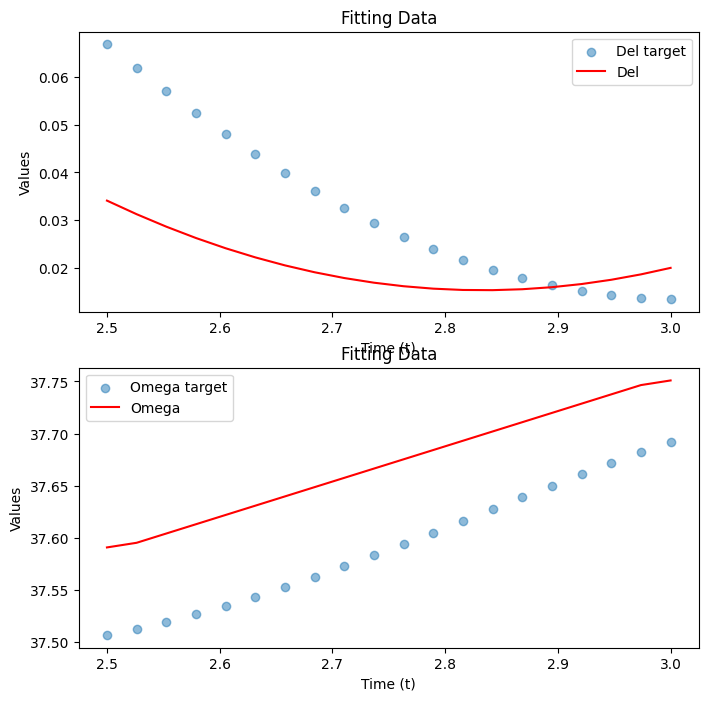

20
20
0.019970229166978992
37.75096360523608
[0.03408206 0.03123203 0.02861615 0.02623442 0.02408682 0.02217338
 0.02049407 0.01904891 0.0178379  0.01686103 0.0161183  0.01560971
 0.01533527 0.01529498 0.01548883 0.01591682 0.01657896 0.01747524
 0.01860566 0.01997023]
[37.59080909 37.59525782 37.6041553  37.61305277 37.62195024 37.63084772
 37.63974519 37.64864266 37.65754014 37.66643761 37.67533508 37.68423256
 37.69313003 37.7020275  37.71092498 37.71982245 37.72871992 37.7376174
 37.74651487 37.75096361]


In [11]:
import matplotlib.pyplot as plt

# Plot the target values and the fitted curve
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del_target_values, label='Del target', alpha=0.5)
print('===================')
delta_pred = np.array([f(theta,w,t_i)[0] for t_i in t_data])
print(len(delta_pred))
print(len(t_data))
plt.plot(t_data, delta_pred, 'r', label='Del')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

print(delta_pred)
# Plot the target values and the fitted curve
# plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega_target_values, label='Omega target', alpha=0.5)

del_prime = np.gradient(delta_pred, t_data)
omega_pred = del_prime+ws

plt.plot(t_data, omega_pred, 'r', label='Omega')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.show()

# plt.show()
print(len(delta_pred))
print(len(omega_pred))
print(delta_pred[-1])
print(omega_pred[-1])

print(delta_pred)
print(omega_pred)


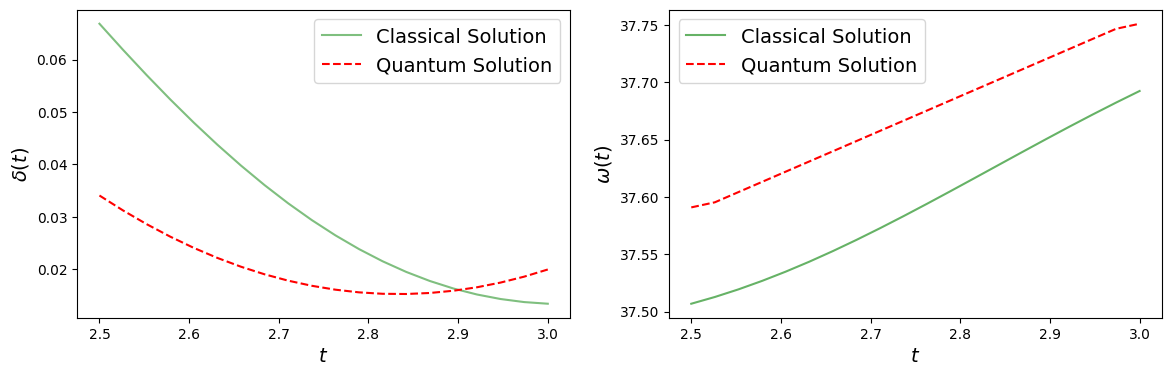

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Set a larger font size
font_size = 14

# Plot the delta and omega values side by side with padding
fig, axs = plt.subplots(1, 2, figsize=(14, 4))  # 1 row, 2 columns

# Plotting Precise and Quantum Solution for delta(t)
axs[0].plot(t_data, del_target_values,color='green', label='Classical Solution', alpha=0.5)
delta_pred = np.array([f(theta,w,t_i)[0] for t_i in t_data])
axs[0].plot(t_data, delta_pred, 'r--', label='Quantum Solution')

axs[0].set_xlabel('$t$', fontsize=font_size)  # Set font size for x-axis label
axs[0].set_ylabel('$\delta(t)$', fontsize=font_size)  # Set font size for y-axis label
axs[0].legend(fontsize=font_size)  # Set font size for legend
# axs[0].set_title('Comparison of Precise and Quantum Solution for $\\delta(t)$', fontsize=font_size)  # Set font size for title

# Plotting Precise and Quantum Solution for omega(t)
axs[1].plot(t_data, omega_target_values,color='green', label='Classical Solution', alpha=0.6)

# Calculating omega_pred using the gradient of delta_pred and ws
del_prime = np.gradient(delta_pred, t_data)
omega_pred = del_prime + ws

axs[1].plot(t_data, omega_pred, 'r--', label='Quantum Solution')

axs[1].set_xlabel('$t$', fontsize=font_size)  # Set font size for x-axis label
axs[1].set_ylabel('$\omega(t)$', fontsize=font_size)  # Set font size for y-axis label
axs[1].legend(fontsize=font_size)  # Set font size for legend
# axs[1].set_title('Comparison of Precise and Quantum Solution for $\\omega(t)$', fontsize=font_size)  # Set font size for title

# Adjust layout for better spacing with added padding
plt.subplots_adjust(wspace=0.2)  # Set the desired width space between subplots

plt.show()
